   # Analyzing Covid-19 Data

![JMU_IA_LOGO](https://creative.chbs.jmu.edu/images/logos/intelligence-analysis.png)

## Background
Coronavirus is an acute disease in humans, which is characterized mainly by fever and cough and is capable of progressing to severe symptoms and in some cases death, especially in older people and those with underlying health conditions. In late 2019, the first identification of Covid-19 occurred in Wuhan, China. Despite efforts to contain the virus, it rapidly spread. On January 30th, 2020, the World Health Organization recognized it as an international concern. On March 11th, 2020, the virus was declared a global pandemic, resulting in significant social and economic disruption. The data presented in this report provides insights into how the virus impacted the world throughout the year 2020.

## Data
The data is provided by the European Centre for
Disease Prevention and Control https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

## Importing Data

In [74]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
!pip install xlrd
df = pd.read_excel('s3://jrf-ia241-bucket/covid_data.xls')
df.head(10)

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-09-12 00:00:00,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-08-12 00:00:00,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-07-12 00:00:00,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-06-12 00:00:00,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-05-12 00:00:00,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


## United States Covid-19 Data

In [86]:
usa_data = df.loc[df['countriesAndTerritories'] == 'United_States_of_America']
usa_data[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,death_rate
59001,14/12/2020,14,12,2020,189723,1340,United_States_of_America,US,USA,329064917.0,America,873.211592,0.007063
59002,13/12/2020,13,12,2020,216017,2315,United_States_of_America,US,USA,329064917.0,America,857.089241,0.010717
59003,2020-12-12 00:00:00,12,12,2020,234633,3343,United_States_of_America,US,USA,329064917.0,America,838.514183,0.014248
59004,2020-11-12 00:00:00,11,12,2020,224680,2748,United_States_of_America,US,USA,329064917.0,America,830.394205,0.012231
59005,2020-10-12 00:00:00,10,12,2020,220025,3124,United_States_of_America,US,USA,329064917.0,America,794.356027,0.014198
59006,2020-09-12 00:00:00,9,12,2020,217344,2564,United_States_of_America,US,USA,329064917.0,America,784.195114,0.011797
59007,2020-08-12 00:00:00,8,12,2020,197334,1433,United_States_of_America,US,USA,329064917.0,America,769.896719,0.007262
59008,2020-07-12 00:00:00,7,12,2020,173432,1111,United_States_of_America,US,USA,329064917.0,America,762.794473,0.006406
59009,2020-06-12 00:00:00,6,12,2020,211933,2203,United_States_of_America,US,USA,329064917.0,America,757.944062,0.010395
59010,2020-05-12 00:00:00,5,12,2020,231930,2680,United_States_of_America,US,USA,329064917.0,America,746.870564,0.011555


## Q1: What are the average Covid-19 cases per month?

<AxesSubplot: xlabel='month'>

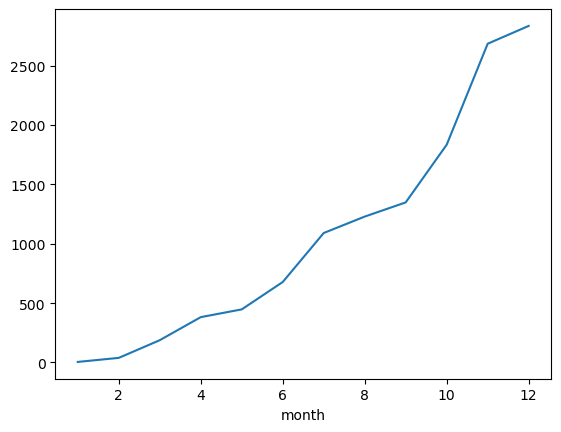

In [70]:
avg_covid_month = df.groupby('month')['cases'].mean()
avg_covid_month.plot()

## Q2: What are the top 10 countries with the highest recorded deaths from Covid-19?

<AxesSubplot: xlabel='countriesAndTerritories'>

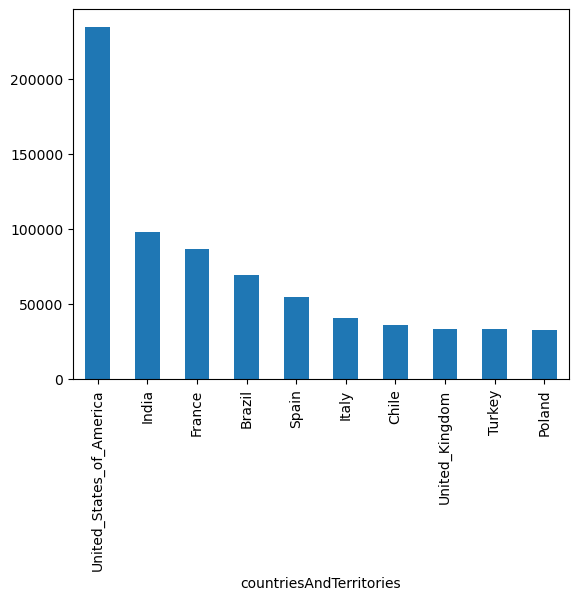

In [71]:
death_countries= df.groupby('countriesAndTerritories')['cases'].max()
death_countries.nlargest(10).plot.bar()

## Q3: What is the death rate for Covid-19 in the United States?

In [85]:
df['death_rate'] = df['deaths']/df['cases']
df[:5]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,death_rate
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,0.008043
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,0.030201
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,0.097345
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,0.158730
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,0.079208


<AxesSubplot: xlabel='month', ylabel='death_rate'>

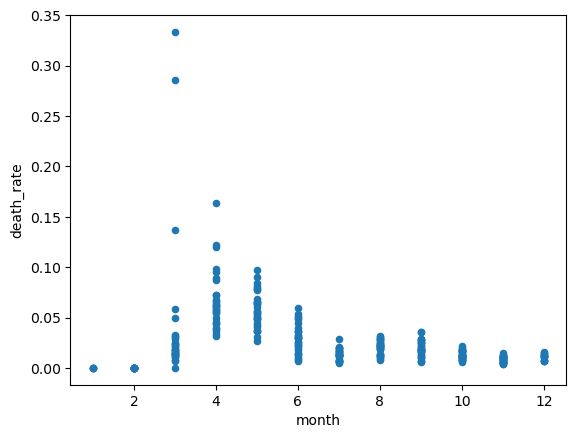

In [87]:
usa_data.plot.scatter('month','death_rate')